# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Fahril Sidik Alfarizi
- **Email:** fahrilsidik207@gmail.com
- **ID Dicoding:** fahrilalfarizi15

## Menentukan Pertanyaan Bisnis

Specific (Spesifik):

- Berapa persentase peningkatan jumlah peminjam sepeda pada hari libur dibandingkan dengan hari kerja?

Measurable (Mengukur):

- Berapa rata-rata jumlah peminjam sepeda per jam pada hari-hari musim panas di tahun 2012?

Action-oriented (Berorientasi Aksi):

- Apa yang dapat dilakukan untuk meningkatkan jumlah peminjam sepeda pada hari-hari dengan kondisi cuaca buruk?

Relevant (Relevan):

- Bagaimana hubungan antara suhu udara dan jumlah peminjam sepeda, serta apa implikasinya terhadap strategi pemasaran?

Time-bound (Terikat Waktu):

- Bagaimana tren penggunaan sepeda pada jam-jam puncak selama hari kerja pada bulan Desember 2011?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
df_Bday = pd.read_csv("/content/Bike-Dataset/day.csv")
df_Bday.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
df_Bhour = pd.read_csv("/content/Bike-Dataset/hour.csv")
df_Bhour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [5]:
print('Dataframe For day:')
df_Bday.info()

print('\nDataframe For hour:')
df_Bhour.info()

Dataframe For day:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB

Dataframe For hour:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173

 > **Descriptive Statistic & Analysis**

In [6]:
df_Bday.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


 melihat info dari dataset day:
*   Jumlah data: 731 entri.
*   Musim paling umum: Musim panas (season 2).
* Dominan Tahun: 2012 (yr = 1).
* Bulan yang sering muncul: Juli (mnth 7).
* Hari libur hanya ada sekitar 2.87% dari total hari.
* Hari kerja adalah mayoritas (sekitar 68.40%).
* Cuaca rata-rata pada keadaan yang baik (weathersit 1).
* Suhu rata-rata adalah sekitar 0.50, dengan suhu perasaan rata-rata sekitar 0.47.
* Kelembaban rata-rata sekitar 0.63 (63%).
* Kecepatan angin rata-rata adalah sekitar 0.19/19% (maksimal 50%).
* Jumlah pengguna casual rata-rata sekitar 848.
* Jumlah pengguna terdaftar rata-rata sekitar 3656.
* Total rental rata-rata sekitar 4504 per hari.

In [7]:
df_Bhour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


melihat info dari dataset hour:
* Dataset terdiri dari 17,379 entri.

Rata-rata kolom-kolom utama adalah sekitar:
* Season atau Musim 2.50 adalah musim rata-rata.
* Tahun atau yr 0.50, perbandingan antara tahun 2011 dan 2012.
* Bulan atau mnth 6.54, rata-rata bulan dalam setahun.
* hr 11.55 adalah jam rata-rata dalam sehari.
* Holiday 0.03 adalah persentase hari libur.
* weekday 3.00 adalah hari rata-rata dalam seminggu.
* workingday 0.68 menunjukan persentase hari kerja.
* Kweathersit 1.43 untuk kondisi cuaca rata-rata.
* temp 0.50 menunjukan suhu rata-rata yang normal.
* atemp 0.48 ialah suhu perasaan mendekati suhu sebenarnya.
* hum 0.48 mengindikasikan kelembaban rata-rata.
* windspeed 0.63 merupakan kecepatan angin rata-rata.
* casual 35.68 itu rata-rata jumlah pengguna casual.
* registered dengan jumlah 153.79  pengguna terdaftar.
* cnt 189.46 yaitu rata-rata jumlah total rental sepeda.

> **> Missing Value**

In [8]:
print('Jumlah Missing value untuk dataset day:')
print(df_Bday.isnull().sum())

print('\nJumlah Missing value untuk dataset:')
print(df_Bhour.isna().sum())

Jumlah Missing value untuk dataset day:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Jumlah Missing value untuk dataset:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


> **> Duplicate Data**

In [9]:
print('Jumlah Duplikat data pada day:', df_Bday.duplicated().sum())
print("Jumlah Duplikat data pada hour:", df_Bhour.duplicated().sum())

Jumlah Duplikat data pada day: 0
Jumlah Duplikat data pada hour: 0


### Cleaning Data

**Data convertion**

In [10]:
df_Bday["dteday"] = pd.to_datetime(df_Bday["dteday"])
df_Bhour["dteday"] = pd.to_datetime(df_Bhour["dteday"])

print('(day)Mengubah tipe data dteday menjadi : ', df_Bday["dteday"].dtypes)
print('(hour)Mengubah tipe data dteday menjadi : ', df_Bhour["dteday"].dtypes)

(day)Mengubah tipe data dteday menjadi :  datetime64[ns]
(hour)Mengubah tipe data dteday menjadi :  datetime64[ns]


## Exploratory Data Analysis (EDA)

**> Korelasi variabel numerik**

<ipython-input-11-306d670d4df8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_day = df_Bday.corr()


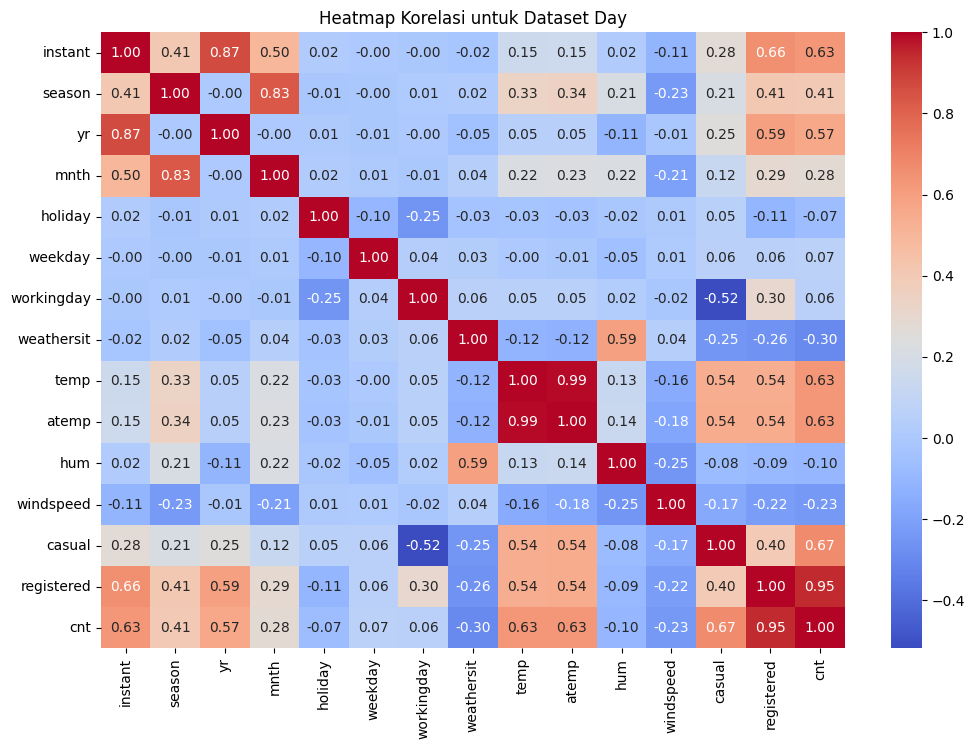

In [11]:
# Menghitung korelasi antar atribut numerik
correlation_matrix_day = df_Bday.corr()

# Membuat heatmap korelasi untuk df_day
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_day, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi untuk Dataset Day')
plt.show()

**> Distribusi variabel numerik**

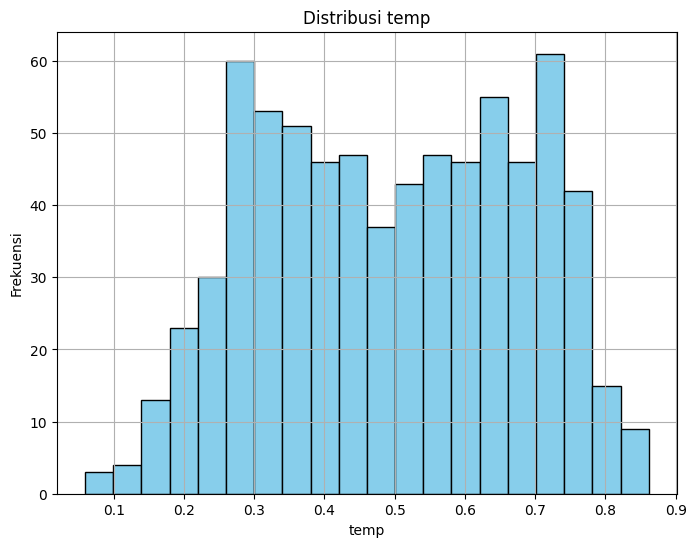

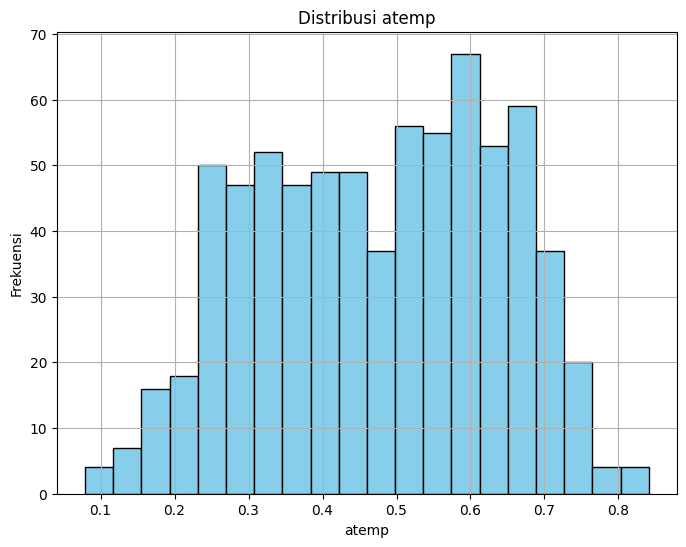

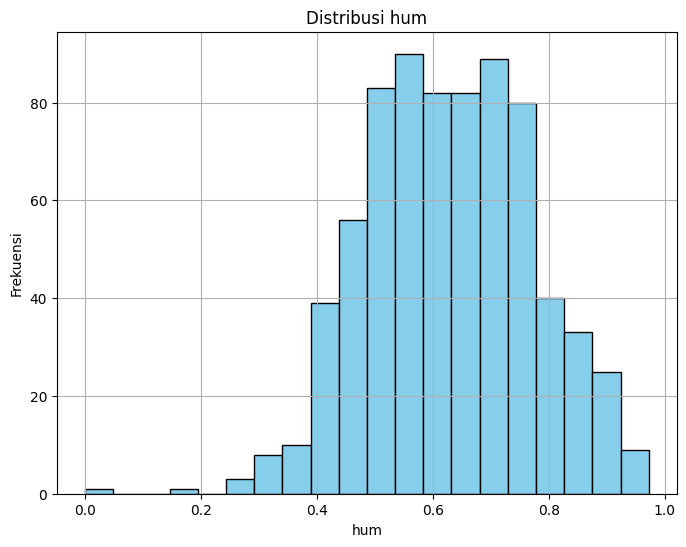

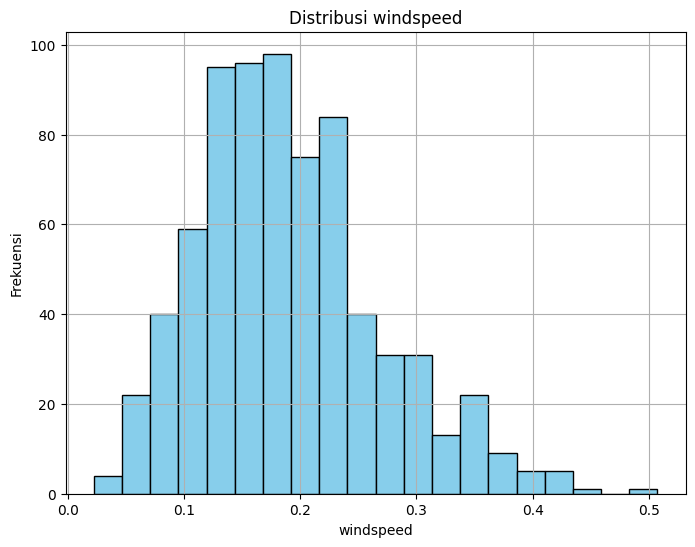

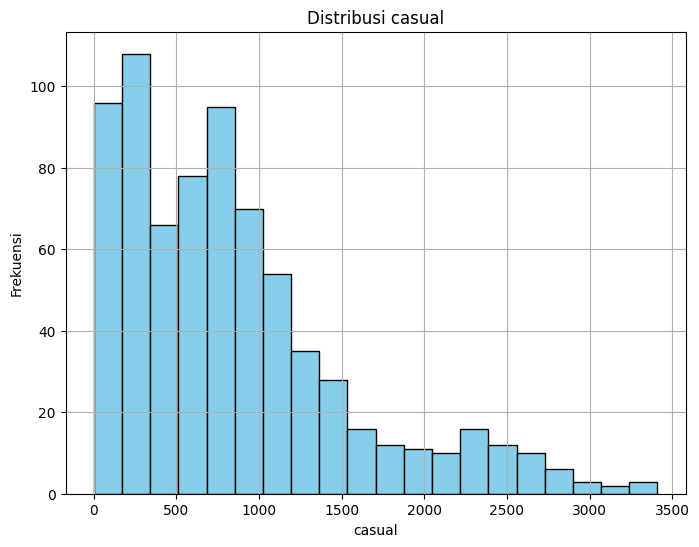

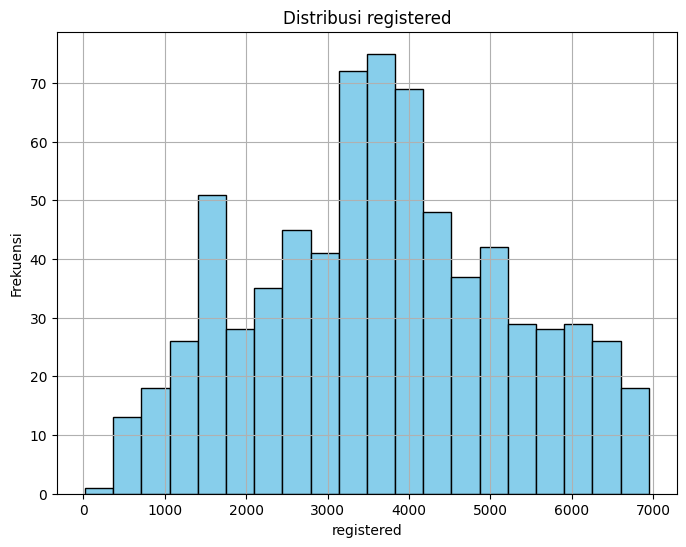

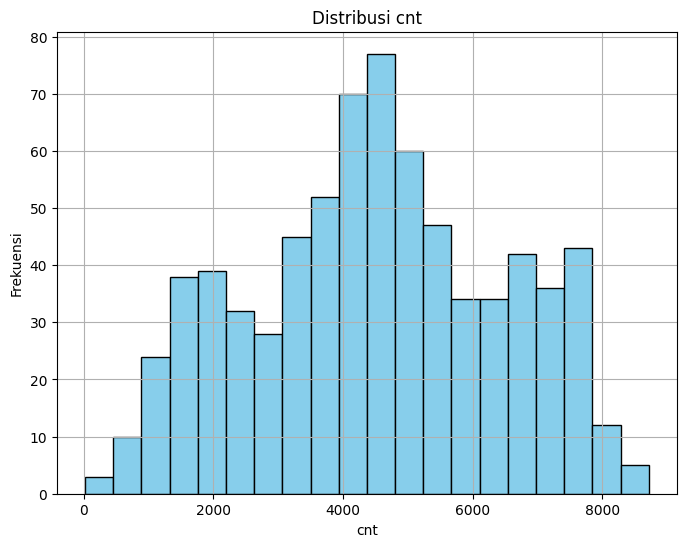

In [12]:
numeric_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

# Melakukan loop untuk setiap kolom numerik
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    plt.hist(df_Bday[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.grid(True)
    plt.show()

**> Distribusi variabel kategori**

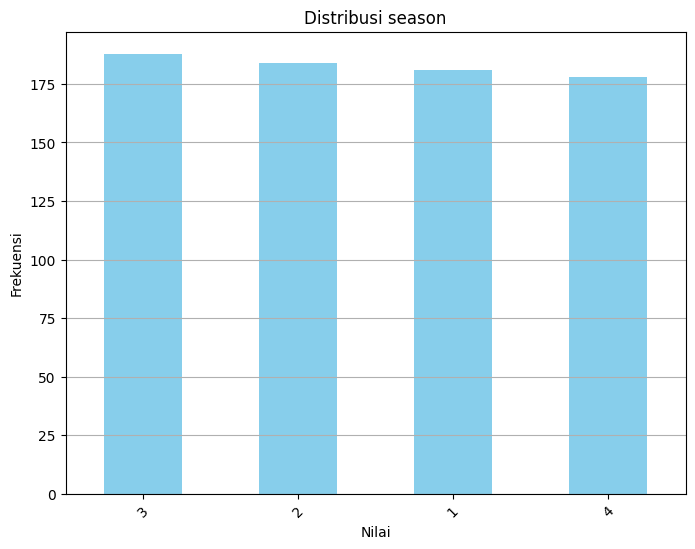

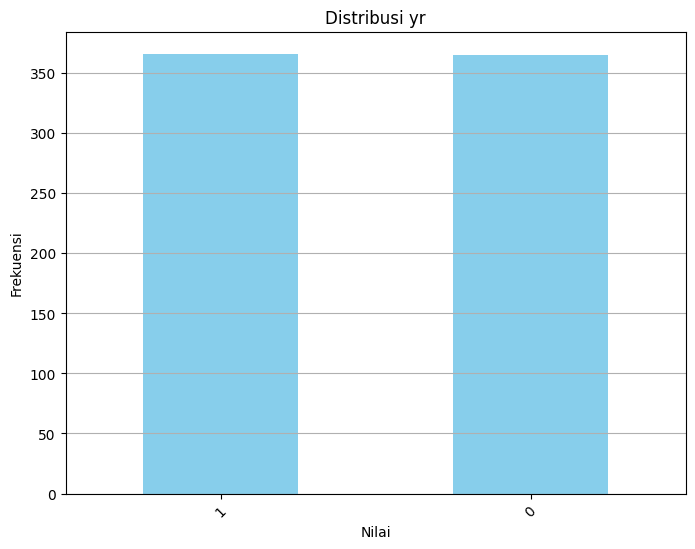

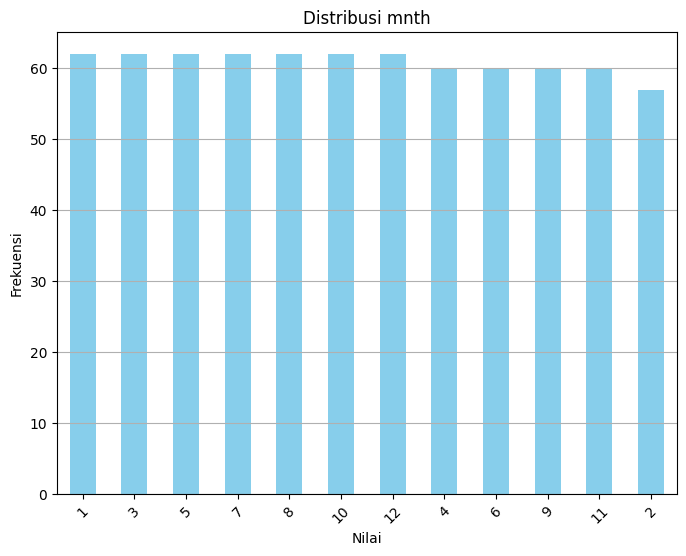

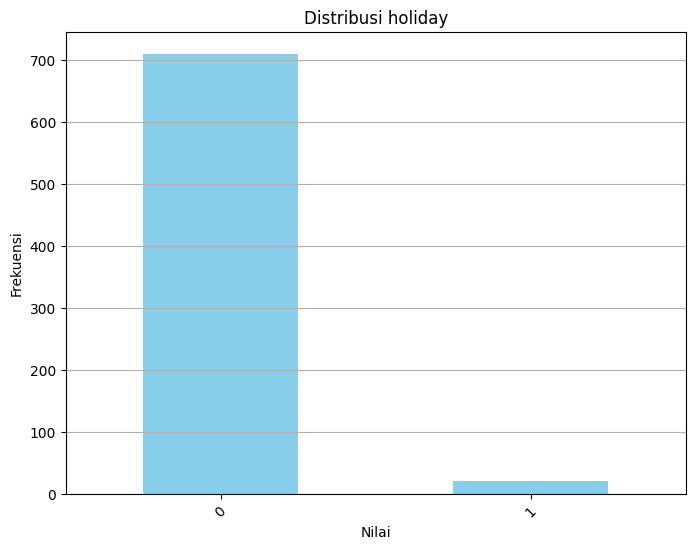

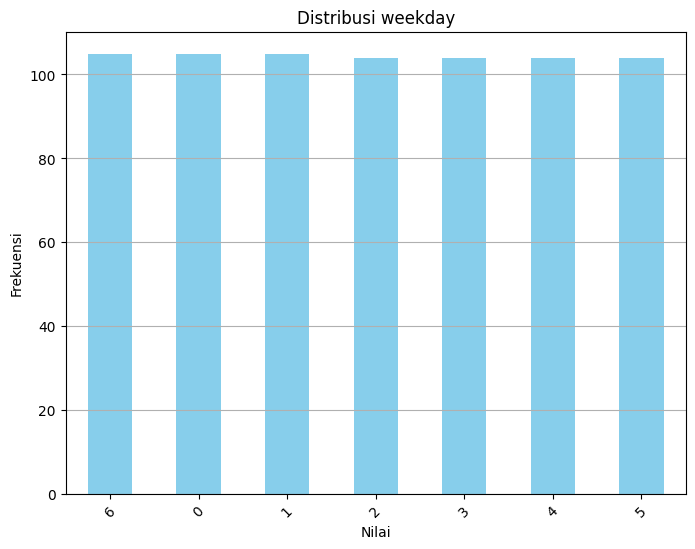

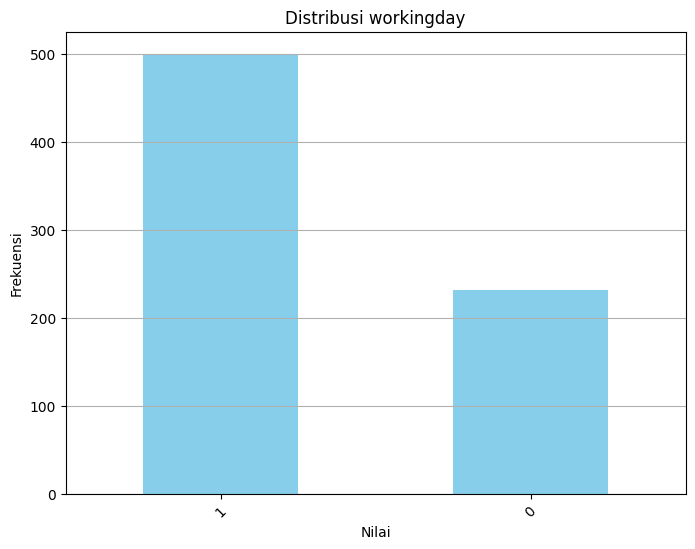

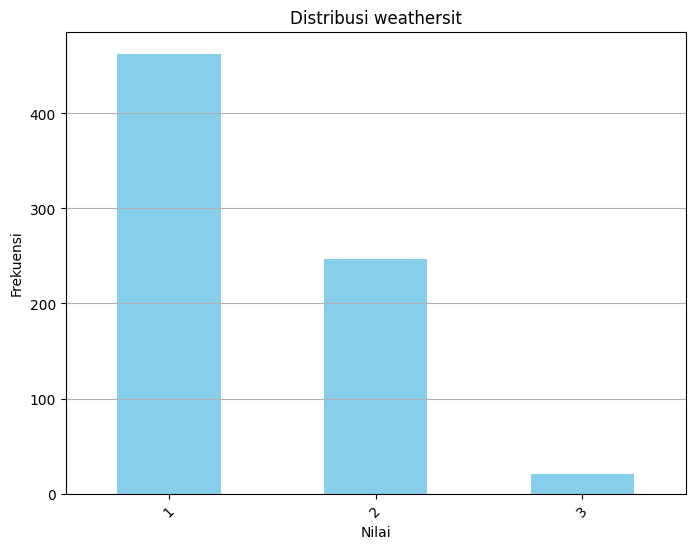

In [13]:
categorical_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    df_Bday[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Distribusi {col}')
    plt.xlabel('Nilai')
    plt.ylabel('Frekuensi')
    plt.xticks(rotation=45)  # Rotasi label sumbu x agar lebih mudah dibaca
    plt.grid(axis='y')  # Menampilkan garis grid hanya pada sumbu y
    plt.show()

**> Hubungan antara Musim dan Jumlah Sewa**

<ipython-input-14-5c04082ef740>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_Bday, x='season', y='cnt', palette='Set2')


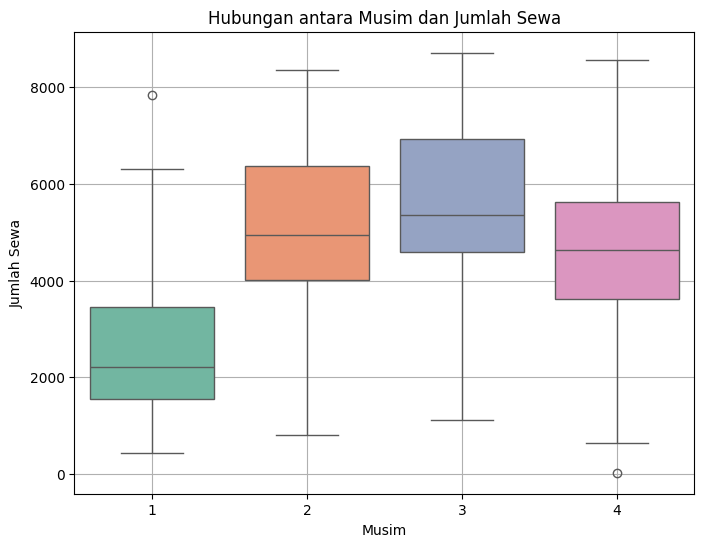

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_Bday, x='season', y='cnt', palette='Set2')
plt.title('Hubungan antara Musim dan Jumlah Sewa')
plt.xlabel('Musim')
plt.ylabel('Jumlah Sewa')
plt.grid(True)
plt.show()

**> Hubungan antara hari libur (holiday) dan jumlah sewa (cnt)**

<ipython-input-15-6114e44cfee5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_Bday, x='holiday', y='cnt', palette='Set2')


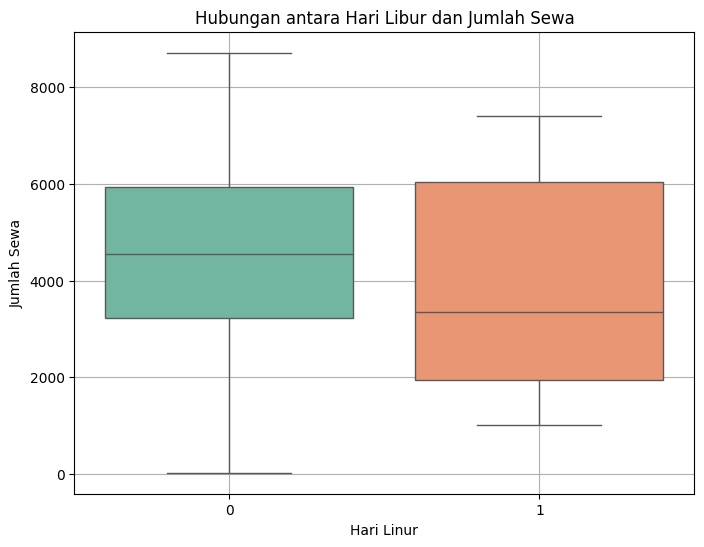

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_Bday, x='holiday', y='cnt', palette='Set2')
plt.title('Hubungan antara Hari Libur dan Jumlah Sewa')
plt.xlabel('Hari Linur')
plt.ylabel('Jumlah Sewa')
plt.grid(True)
plt.show()

**> Hubungan antara Cuaca dan Jumlah Sewa**

<ipython-input-16-56d6fff9cf67>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_Bday, x='weathersit', y='cnt', palette='Set2')


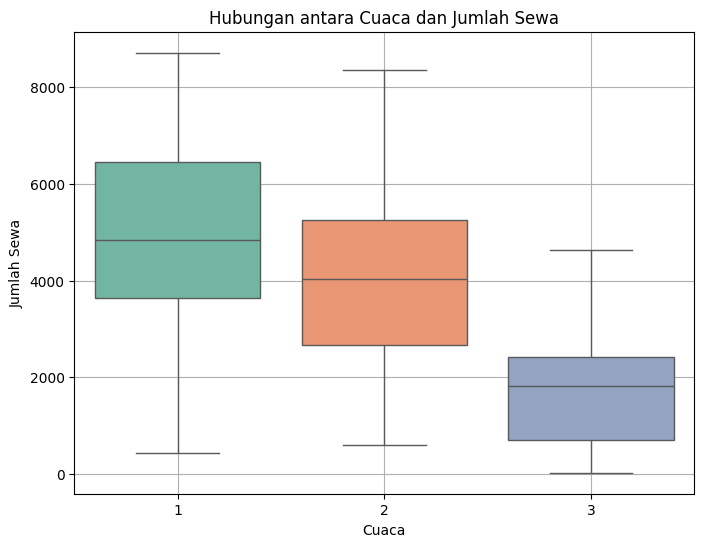

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_Bday, x='weathersit', y='cnt', palette='Set2')
plt.title('Hubungan antara Cuaca dan Jumlah Sewa')
plt.xlabel('Cuaca')
plt.ylabel('Jumlah Sewa')
plt.grid(True)
plt.show()

**> Scatter Plot antara Suhu (temp) dan Jumlah Sewa (cnt)**

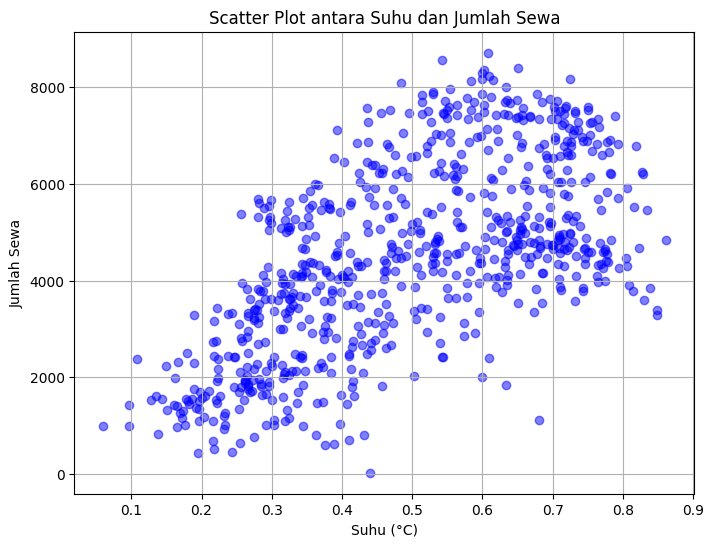

In [17]:
# Membuat scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_Bday['temp'], df_Bday['cnt'], color='blue', alpha=0.5)
plt.title('Scatter Plot antara Suhu dan Jumlah Sewa')
plt.xlabel('Suhu (°C)')
plt.ylabel('Jumlah Sewa')
plt.grid(True)
plt.show()

### teknik analisis lanjutan

**> Clustering**

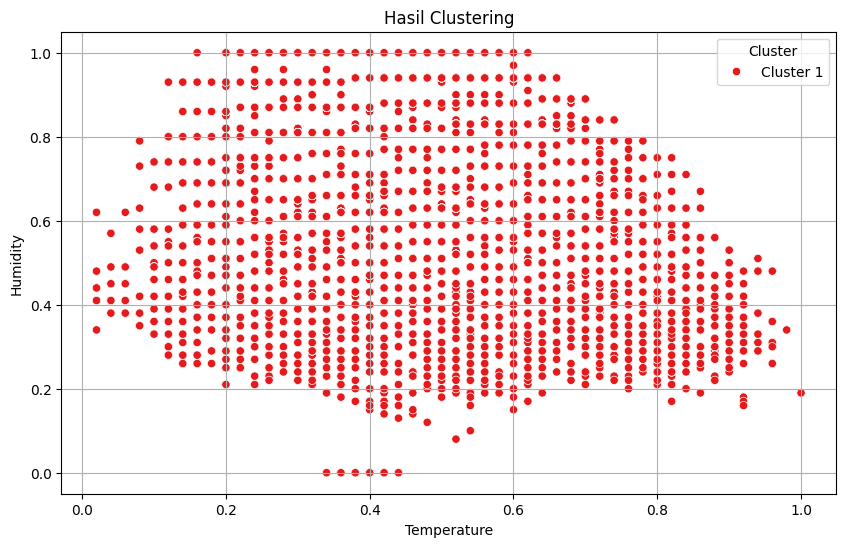

In [44]:
# 2. Pilih fitur-fitur yang akan digunakan untuk clustering
selected_features = df_Bhour[['season', 'holiday', 'weekday', 'weathersit', 'temp', 'hum', 'windspeed']]
clusters = []

for temp in selected_features['temp']:
    if temp <= 5:
        clusters.append('Cluster 1')
    elif 5 < temp <= 15:
        clusters.append('Cluster 2')
    elif 15 < temp <= 25:
        clusters.append('Cluster 3')
    else:
        clusters.append('Cluster 4')

# Tambahkan label cluster ke DataFrame
df_Bhour['Cluster'] = clusters

# Visualisasikan hasil clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(df_Bhour, x='temp', y='hum', hue='Cluster', palette='Set1')
plt.title('Hasil Clustering')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

Dari hasil Clustering yang sudah dilakukan antara temp dan hum menunjukkan bahwa data dalam cluster-cluster tersebut cenderung memiliki pola yang serupa dalam hal temperatur dan kelembaban udara. Artinya, titik data dalam cluster yang sama memiliki nilai yang mendekati satu sama lain dalam hal temperatur dan kelembaban udara.

**Implikasi:**
- pola tersebut dapat digunakan untuk memprediksi cuaca di suatu wilayah dalam rentang waktu tertentu, yang penting untuk berbagai kegiatan terutama bersepeda.

pola-pola cuaca yang serupa dapat memengaruhi permintaan dan perilaku konsumen terhadap produk dan layanan tertentu.

## Visualization & Explanatory Analysis

### 1. Berapa persentase peningkatan jumlah peminjam sepeda pada hari libur (holiday = 1) dibandingkan dengan hari kerja?

In [18]:
# Kelompokkan data berdasarkan jenis hari (libur atau hari kerja)
grouped_data = df_Bday.groupby('holiday')['cnt'].mean()

# Hitung rata-rata jumlah peminjam pada hari libur dan hari kerja
avg_rental_holiday = grouped_data[1]
avg_rental_workday = grouped_data[0]

# Hitung persentase peningkatan jumlah peminjam pada hari libur dibandingkan dengan hari kerja
percentage_increase = ((avg_rental_holiday - avg_rental_workday) / avg_rental_workday) * 100

print(f'Persentase peningkatan jumlah peminjam pada hari libur dibandingkan dengan hari kerja: {percentage_increase:.2f}%')

Persentase peningkatan jumlah peminjam pada hari libur dibandingkan dengan hari kerja: -17.50%


hasil presentase menunjukan bahwa rata-rata jumlah peminjam pada hari libur lebih rendah daripada pada hari kerja.

Ini bisa disebabkan oleh beberapa faktor, seperti:

- Perbedaan perilaku masyarakat: Pada hari libur, orang mungkin memiliki aktivitas atau rutinitas yang berbeda, sehingga tidak banyak yang menggunakan layanan penyewaan sepeda.
- Ketersediaan sepeda: Pada hari libur, jumlah sepeda yang tersedia untuk disewakan mungkin lebih sedikit daripada pada hari kerja.
- Cuaca: Cuaca pada hari libur mungkin tidak sebaik pada hari kerja, sehingga mengurangi minat orang untuk menggunakan sepeda.
- Promosi atau acara khusus: Pada hari libur, mungkin tidak ada promosi atau acara khusus yang meningkatkan penggunaan sepeda.

### 2. Berapa rata-rata jumlah peminjam sepeda per jam pada hari-hari musim panas di tahun 2012?

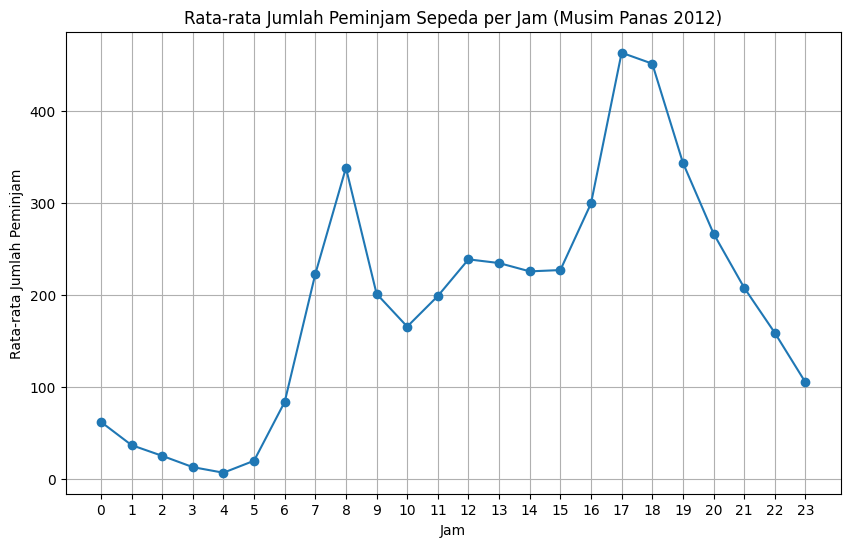

In [19]:
# Filter data untuk musim panas di tahun 2012 (misalnya, musim panas dari bulan Juni hingga Agustus)
summer_2012_data = df_Bhour[(df_Bhour['yr'] == 0) & (df_Bhour['mnth'].isin([6, 7, 8]))]

# Hitung rata-rata jumlah peminjam sepeda per jam
average_hourly_rentals = summer_2012_data.groupby('hr')['cnt'].mean()

# Membuat grafik
plt.figure(figsize=(10, 6))
plt.plot(average_hourly_rentals.index, average_hourly_rentals.values, marker='o', linestyle='-')
plt.title('Rata-rata Jumlah Peminjam Sepeda per Jam (Musim Panas 2012)')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Jumlah Peminjam')
plt.grid(True)
plt.xticks(range(24))  # Label sumbu x dari 0 hingga 23 (jumlah jam)
plt.show()

Dalam Grafik menunjukkan bahwa rata-rata jumlah peminjam sepeda per jam bervariasi tergantung pada waktu. Puncak peminjaman terjadi pada jam 08.00 dan jam 17.00, sedangkan jumlah peminjam paling rendah terjadi pada jam 4.00.

### 3. Apa yang dapat dilakukan untuk meningkatkan jumlah peminjam sepeda pada hari-hari dengan kondisi cuaca buruk (3)?

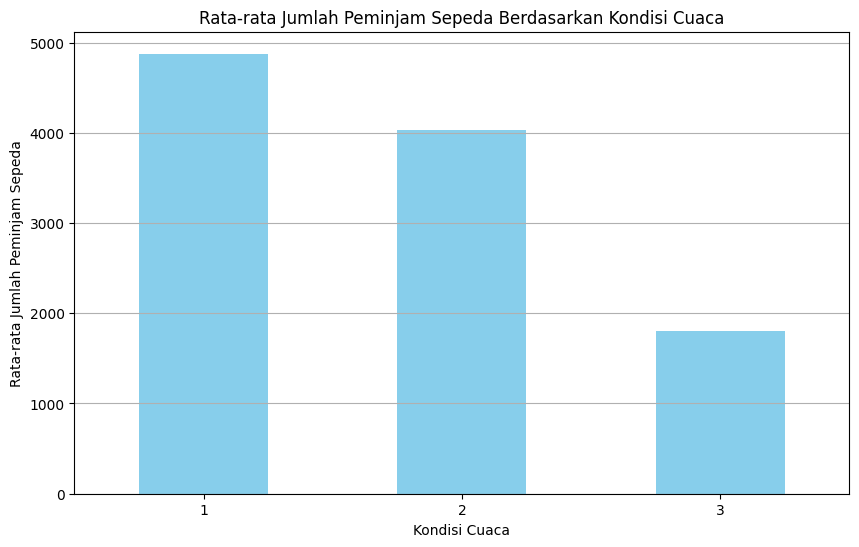

In [20]:
# Kelompokkan data berdasarkan kondisi cuaca (weathersit) dan hitung rata-rata jumlah peminjam sepeda
average_rentals_by_weather = df_Bday.groupby('weathersit')['cnt'].mean()

# Membuat grafik
plt.figure(figsize=(10, 6))
average_rentals_by_weather.plot(kind='bar', color='skyblue')
plt.title('Rata-rata Jumlah Peminjam Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Jumlah Peminjam Sepeda')
plt.xticks(rotation=0)  # Rotasi label sumbu x
plt.grid(axis='y')  # Menampilkan grid hanya pada sumbu y
plt.show()

**Strategi :**

- Penyediaan Perlindungan Cuaca: Memasang atap atau tempat penitipan sepeda yang terlindungi dari hujan dan angin dapat memberikan insentif bagi pengguna sepeda untuk tetap menggunakan layanan penyewaan sepeda meskipun cuaca buruk.

- Penawaran Promosi Khusus: Menawarkan diskon atau promosi khusus untuk penyewaan sepeda pada hari-hari dengan kondisi cuaca buruk dapat meningkatkan minat masyarakat untuk tetap bersepeda, meskipun cuaca tidak bersahabat.

- Perbaikan Infrastruktur: Memperbaiki jalur sepeda dan menyediakan rute yang aman dan terpisah dari lalu lintas kendaraan bermotor dapat membuat orang merasa lebih nyaman untuk bersepeda bahkan dalam cuaca buruk.

- Edukasi dan Kesadaran: Melakukan kampanye edukasi tentang manfaat bersepeda dan cara bersepeda yang aman dalam cuaca buruk dapat membantu mengubah persepsi masyarakat terhadap bersepeda saat kondisi cuaca tidak mendukung.

- Perbaikan Layanan Transportasi Publik: Memperluas atau meningkatkan layanan transportasi publik pada hari-hari dengan kondisi cuaca buruk dapat memberikan alternatif transportasi yang lebih baik bagi orang-orang yang tidak ingin bersepeda dalam cuaca buruk.

### 4. Bagaimana hubungan antara suhu udara dan jumlah peminjam sepeda, serta apa implikasinya terhadap strategi pemasaran?

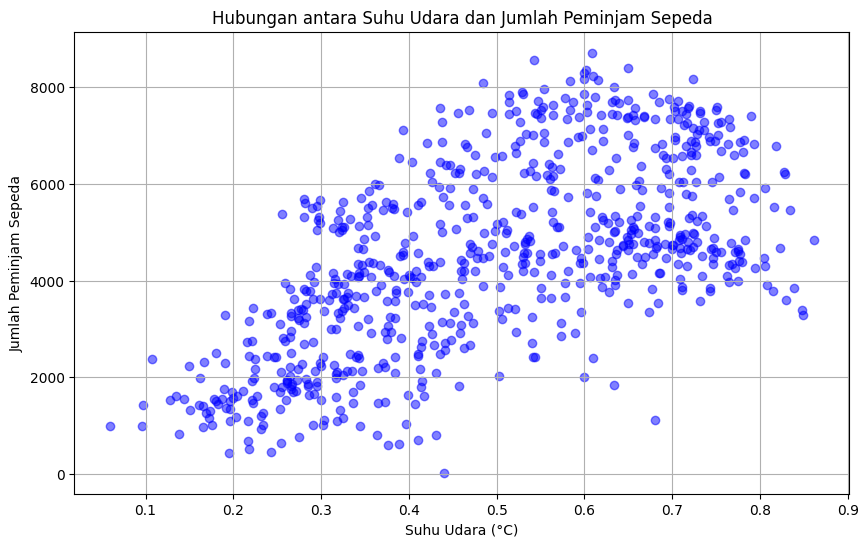

In [21]:
# Scatter plot antara suhu udara dan jumlah peminjam sepeda
plt.figure(figsize=(10, 6))
plt.scatter(df_Bday['temp'], df_Bday['cnt'], color='blue', alpha=0.5)
plt.title('Hubungan antara Suhu Udara dan Jumlah Peminjam Sepeda')
plt.xlabel('Suhu Udara (°C)')
plt.ylabel('Jumlah Peminjam Sepeda')
plt.grid(True)
plt.show()

Pada grafik terlihat korelasi menunjukkan adanya hubungan antara suhu udara dan jumlah peminjam sepeda. ini menandakan bahwa suhu juga berpengaruh terhadap peminjaman sepeda.

**Implikasi :**

- Menyesuaikan Penawaran Promosi: penawaran promosi atau diskon khusus dengan kondisi cuaca. Misalnya, menawarkan diskon khusus pada hari-hari dengan suhu udara yang ideal untuk bersepeda.

- Kampanye Pemasaran Berbasis Cuaca: mengembangkan kampanye pemasaran yang lebih terfokus pada cuaca, dengan menyoroti manfaat bersepeda dalam kondisi cuaca yang cocok. Misalnya, mengedukasi pelanggan tentang manfaat bersepeda saat cuaca cerah atau menyediakan tips untuk bersepeda dengan nyaman dalam cuaca buruk.

- Penyesuaian Stok Sepeda: menyesuaikan stok sepeda untuk memenuhi permintaan yang berubah-ubah sepanjang tahun. Misalnya, menambah stok sepeda pada musim panas atau menguranginya pada musim dingin.

### 5. Bagaimana tren penggunaan sepeda pada jam-jam puncak selama hari libur pada bulan Desember 2011 (0)?

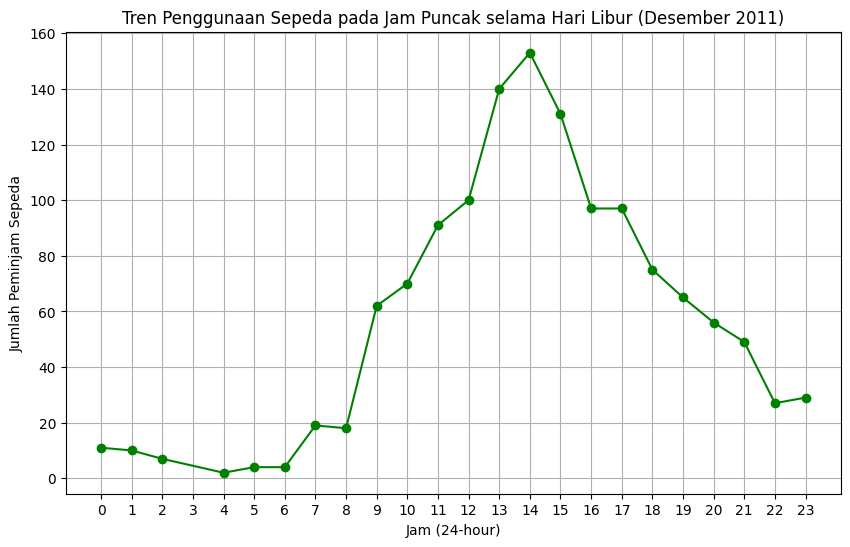

Tren Penggunaan Sepeda pada Jam Puncak selama Hari Kerja (Desember 2011):
hr
0      11
1      10
2       7
4       2
5       4
6       4
7      19
8      18
9      62
10     70
11     91
12    100
13    140
14    153
15    131
16     97
17     97
18     75
19     65
20     56
21     49
22     27
23     29
Name: cnt, dtype: int64


In [22]:
# Filter data untuk hari libur pada bulan Desember 2011
december_2011_holiday = df_Bhour[(df_Bhour['yr'] == 0) & (df_Bhour['mnth'] == 12) & (df_Bhour['holiday'] == 1)]

# Kelompokkan data berdasarkan jam dan hitung jumlah peminjam sepeda pada setiap jam
hourly_rentals_december_2011 = december_2011_holiday.groupby('hr')['cnt'].sum()

# Visualisasikan tren penggunaan sepeda pada jam-jam puncak selama hari klibur pada bulan Desember 2011
plt.figure(figsize=(10, 6))
hourly_rentals_december_2011.plot(kind='line', marker='o', color='green')
plt.title('Tren Penggunaan Sepeda pada Jam Puncak selama Hari Libur (Desember 2011)')
plt.xlabel('Jam (24-hour)')
plt.ylabel('Jumlah Peminjam Sepeda')
plt.grid(True)
plt.xticks(range(24))  # Label sumbu x dari 0 hingga 23 (jumlah jam)
plt.show()

print("Tren Penggunaan Sepeda pada Jam Puncak selama Hari Kerja (Desember 2011):")
print(hourly_rentals_december_2011)

Pada jam 14:00, terjadi lonjakan jumlah peminjam sepeda dengan 153 sewa, kemungkinan karena banyaknya orang yang bersepeda selama liburan Natal. Aktivitas peminjaman sepeda meningkat sejak pukul 8:00 pagi dan mencapai puncaknya antara jam 13:00 dan 14:00, kemudian mulai menurun hingga larut malam. Ini mencerminkan pola penggunaan sepeda selama Hari Libur, dipengaruhi oleh kegiatan liburan dan rutinitas masyarakat.

## Conclusion

1. Penurunan Jumlah Peminjam Sepeda pada Hari Libur:
Terjadi penurunan sebesar 17.50% dalam jumlah peminjam sepeda pada hari libur dibandingkan dengan hari kerja. Penurunan ini dapat disebabkan oleh perbedaan perilaku masyarakat, ketersediaan sepeda, kondisi cuaca, dan promosi khusus yang mungkin mempengaruhi penggunaan sepeda.

2. Pola Penggunaan Sepeda pada Hari-hari Musim Panas 2012:
Analisis menunjukkan variasi rata-rata penggunaan sepeda per jam selama hari-hari musim panas 2012. Puncak penggunaan terjadi pada jam 08.00 dan jam 17.00, sedangkan jumlah peminjam paling rendah terjadi pada jam 4.00.

3. Strategi untuk Cuaca Buruk:
Berbagai strategi dapat diterapkan untuk meningkatkan penggunaan sepeda saat cuaca buruk, termasuk perlindungan cuaca, promosi khusus, perbaikan infrastruktur, edukasi, dan perbaikan layanan transportasi publik.

4. Hubungan Suhu Udara dengan Jumlah Peminjam Sepeda:
Ada korelasi antara suhu udara dan jumlah peminjam sepeda, dengan cuaca hangat cenderung meningkatkan penggunaan sepeda.

5. Tren Penggunaan Sepeda pada Hari Libur di Bulan Desember 2011:
Tren penggunaan sepeda pada hari libur di bulan Desember 2011 menunjukkan peningkatan aktivitas pada siang hari, dengan puncak penggunaan sepeda terjadi sekitar jam 14:00.